In [1]:
import numpy as np

In [2]:
import pandas as pd

def get_normalization_infos(*x_s, columns):
    normalization_infos = pd.DataFrame(data=[[1000 for _ in range(len(columns))],[0 for _ in range(len(columns))]],
                                       index=["min","max"],
                                       columns=columns)
    for x in x_s :
        for col in columns:
            min_value = min(normalization_infos[col]["min"], x[col].min())
            max_value = max(normalization_infos[col]["max"], x[col].max())
            normalization_infos[col] = [min_value, max_value]

    normalization_infos.loc["spread"] = normalization_infos.apply(lambda c : c["max"] - c["min"], axis=0)

    return normalization_infos


def normalize(x : pd.DataFrame, normalization_infos : pd.DataFrame):
    for col in x.columns:
        x[col] = (x[col] - normalization_infos[col]["min"])/normalization_infos[col]["spread"]
    return x

cols_to_drop = {"day","Id", "station_id","longitude_idx","latitude_idx", "next hour precipitation (kg/m^2)", "wind_direction (deg)"}

df_2016 = pd.read_csv("../preprocessed_data_Defi-IA-2022-Rain-Frogs/X_all_2016_final_by_day.zip")
df_2017 = pd.read_csv("../preprocessed_data_Defi-IA-2022-Rain-Frogs/X_all_2017_final_by_day.zip")
x_train = pd.concat([df_2016, df_2017], axis=0)

del df_2017
del df_2016

x_train["raining"] = x_train["ground_truth"].apply(lambda x : 0 if (x==0) else 1)
#drop unnecessary columns
x_train.drop(list(set(x_train.columns)&cols_to_drop), axis=1, inplace=True)

x_train = x_train[['raining', 'ground_truth', 'month']]

# {1: 0, 2: 3, 3: 0, 4: 0, 5: 2, 6: 1, 7: 1, 8: 2, 9: 1, 10: 2, 11: 3, 12: 3}

# [1 1 1 1 0 2 2 2 2 0 1 1]

"""1, 3, 4, 6, 7, 9
[5, 8, 10]
[2, 11, 11]

Cluster 1 : January, February, March, April, November, December
Cluster 2 : May, October
Cluster 3 : June, July, August, September"""

cluster1 = x_train[x_train['month'].isin([1, 2, 3, 4, 11, 12])]
cluster2 = x_train[x_train['month'].isin([5, 10])]
cluster3 = x_train[x_train['month'].isin([6, 7, 8, 9])]

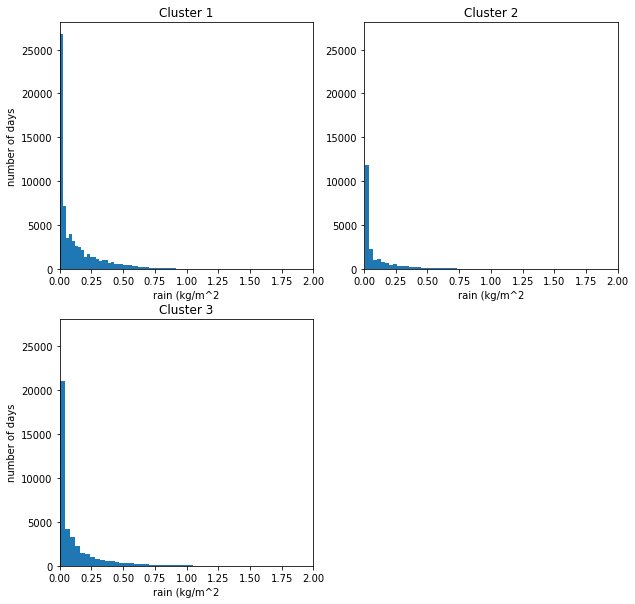

In [21]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1)

ax1.hist(c1["ground_truth"], bins=100)
ax1.set_title("Cluster 1")
ax1.set_xlim([0,2])
ax1.set_xlabel("rain (kg/m^2")
ax1.set_ylabel("number of days")

ax2.hist(c2["ground_truth"], bins=100)
ax2.set_xlim([0,2])
ax2.set_title("Cluster 2")
ax2.set_xlabel("rain (kg/m^2")
# ax2.set_ylabel("number of days")

ax3.hist(c3["ground_truth"], bins=100)
ax3.set_xlim([0,2])
ax3.set_title("Cluster 3")
ax3.set_xlabel("rain (kg/m^2")
ax3.set_ylabel("number of days")

plt.show()

In [17]:
import seaborn as sns

In [4]:
colors = [""]

c1 = cluster1[cluster1["ground_truth"]!=0]
#c1["color"] = c1["month"].apply(lambda x : sns.color_palette("Paired")[x-1])
c2 = cluster2[cluster2["ground_truth"]!=0]
#c2["color"] = c2["month"].apply(lambda x : sns.color_palette("Paired")[x-1])
c3 = cluster3[cluster3["ground_truth"]!=0]
#c3["color"] = c3["month"].apply(lambda x : sns.color_palette("Paired")[x-1])

In [5]:
c1.head()

,raining,ground_truth,month
1,1,0.150000,1
2,1,0.029167,4
3,1,0.195833,4
4,1,0.141667,4
5,1,0.008333,4


NameError: name 'sns' is not defined

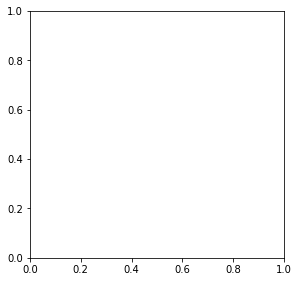

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=c1["ground_truth"], color=c1["color"].values, bins=100)

plt.show()

In [38]:
def hist_to_line(cluster):
    count = np.zeros(shape=(100))
    for i in range(len(cluster)) :
        index = int(cluster["ground_truth"].values[i]*25)
        count[index] += 1
    return count

In [39]:
c1_count = hist_to_line(c1)
c2_count = hist_to_line(c2)
c3_count = hist_to_line(c3)

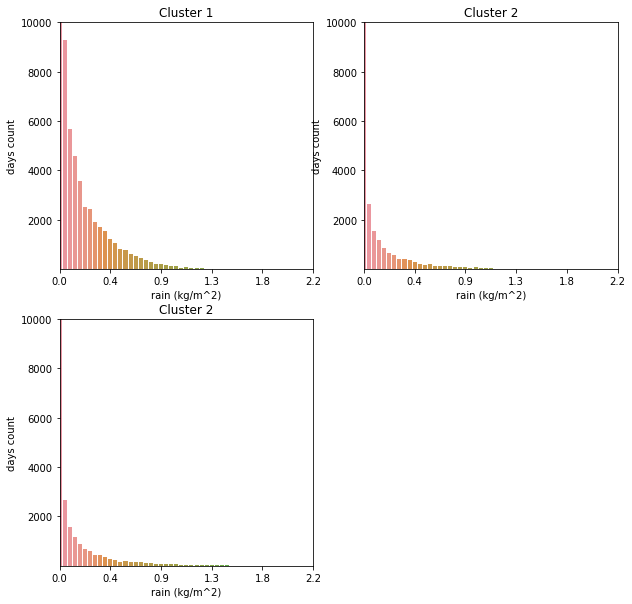

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Cluster 1")
plt.ylabel("days count")
plt.xlabel("rain (kg/m^2)")
sns.barplot(x=np.arange(100),y=c1_count)
plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90], labels=np.round(np.linspace(0,100,10)/25,1))
plt.xlim([0,50])
plt.ylim([2,10000])

plt.subplot(2,2,2)
plt.title("Cluster 2")
plt.ylabel("days count")
plt.xlabel("rain (kg/m^2)")
sns.barplot(x=np.arange(100),y=c2_count)
plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90], labels=np.round(np.linspace(0,100,10)/25,1))
plt.xlim([0,50])
plt.ylim([2,10000])

plt.subplot(2,2,3)
plt.title("Cluster 2")
plt.ylabel("days count")
plt.xlabel("rain (kg/m^2)")
sns.barplot(x=np.arange(100),y=c2_count)
plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90], labels=np.round(np.linspace(0,100,10)/25,1))
plt.xlim([0,50])
plt.ylim([2,10000])
plt.show()

In [ ]:
plt.